## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


### Find no.of samples are there in training and test datasets

In [3]:
print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [4]:
""

''

### Find dimensions of an image in the dataset

In [5]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(10000, 28, 28)
(10000,)
(60000, 28, 28)
(60000,)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
import keras
num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train /= 255
x_test /= 255

### Import the necessary layers from keras to build the model

In [0]:
## All imports are in first Line

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [11]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10



# Define model
model1 = Sequential()

# 1st Conv Layer
model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model1.add(Activation('relu'))

# 2nd Conv Layer
model1.add(Convolution2D(32, 3, 3))
model1.add(Activation('relu'))

# Fully Connected Layer
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))

# Prediction Layer
model1.add(Dense(10))
model1.add(Activation('softmax'))

# Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model1
model1.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
          validation_data=(x_test, y_test), callbacks=callback_list)
    








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.





Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 28s 463us/step - loss: 0.3705 - acc: 0.8660 - val_loss: 0.3022 - val_acc: 0.8885
Epoch 2/10
60000/60000 [==============================] - 14s 229us/step - loss: 0.2262 - acc: 0.9170 - val_loss: 0.2494 - val_acc: 0.9073
Epoch 3/10
60000/60000 [==============================] - 14s 228us/step - loss: 0.1614 - acc: 0.9392 - val_loss: 0.2666 - val_acc: 0.9105
Epoch 4/10
60000/60000 [==============================] - 14s 229us/step - loss: 0.1119 - acc: 0.9587 - val_loss: 0.2826 - val_acc: 0.9151
Epoch 5/10
60000/60000 [==============================] - 14s 227us/step - loss: 0.0734 - acc: 0.9734 - val_loss: 0.3221 - val_acc: 0.9138
Epoch 6/10
60000/60000 [==============================] - 14s 231us/step - loss: 0.0464 - acc: 0.9836 - val_loss: 0.3508 - val_acc: 0.9155
Epoch 7/10
60000/60000 [==============================] - 14s 228us/step - loss: 0.0353 - acc: 0.9881 - val_

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [12]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10



# Define model
model2 = Sequential()

# 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

#Add a MaxPooling Layer of size 2X2 
model2.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Apply Dropout with 0.25 probability 
model2.add(Dropout(0.25,name='drop_1'))

# Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

# Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model2
model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
          validation_data=(x_test, y_test), callbacks=callback_list)
    





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.3943 - acc: 0.8577 - val_loss: 0.3017 - val_acc: 0.8884
Epoch 2/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.2558 - acc: 0.9071 - val_loss: 0.2460 - val_acc: 0.9090
Epoch 3/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.2081 - acc: 0.9231 - val_loss: 0.2341 - val_acc: 0.9128
Epoch 4/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.1750 - acc: 0.9359 - val_loss: 0.2228 - val_acc: 0.9184
Epoch 5/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.1459 - acc: 0.9450 - val_loss: 0.2311 - val_acc: 0.9204
Epoch 6/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.1242 - acc: 0.9533 - val_loss: 0.2364 - val_acc: 0.9220
Epoch 7/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.1028 - acc: 0.9613 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

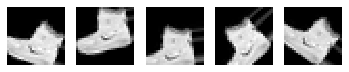

In [14]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [15]:
model2.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=20,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/20
  19/1875 [..............................] - ETA: 18s - loss: 2.6388 - acc: 0.2895

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=20)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 19s 10ms/step - loss: 0.9347 - acc: 0.6579 - val_loss: 0.4691 - val_acc: 0.8257
Epoch 2/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6944 - acc: 0.7420 - val_loss: 0.4790 - val_acc: 0.8270
Epoch 3/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.6331 - acc: 0.7664 - val_loss: 0.4785 - val_acc: 0.8228
Epoch 4/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5896 - acc: 0.7823 - val_loss: 0.4629 - val_acc: 0.8338
Epoch 5/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5582 - acc: 0.7936 - val_loss: 0.4454 - val_acc: 0.8363
Epoch 6/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5387 - acc: 0.8022 - val_loss: 0.4656 - val_acc: 0.8398
Epoch 7/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5220 - acc: 0.8080 - val_loss: 0.4294 - val_acc: 0.8431
Epoch 8/20
1875/1875 [==============================] - 20s

###  Report the final train and validation accuracy

In [16]:
loss_and_metrics = model2.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 3s 54us/step
[0.3318512812336286, 0.8776166666666667]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10

In [18]:
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [19]:
print('--- THE DATA ---')
print('x_train shape:', x_train_cifar.shape)
print(x_train_cifar.shape[0], 'train samples')
print(x_test_cifar.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [20]:

print(x_train_cifar.shape)
print(y_train_cifar.shape)
print(x_test_cifar.shape)
print(y_test_cifar.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [0]:
np.unique(y_train_cifar)


import keras
num_classes = 10
# convert class vectors to binary class matrices
y_train_c = keras.utils.to_categorical(y_train_cifar, num_classes)
y_test_c = keras.utils.to_categorical(y_test_cifar, num_classes)






In [0]:

# x_train_c = x_train_cifar.reshape(x_train_cifar.shape[0], 32, 32, 1).astype('float32')
# x_test_c = x_test_cifar.reshape(x_test_cifar.shape[0], 32, 32, 1).astype('float32')


x_train_cifar = x_train_cifar.astype('float32')
x_test_cifar = x_test_cifar.astype('float32')

In [0]:
x_train_cifar /= 255
x_test_cifar /= 255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen2 = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

# Prepare the generator
datagen2.fit(x_train_cifar)

### **Prepare/fit the generator.**

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

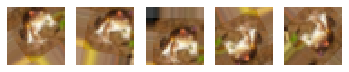

In [25]:
from matplotlib import pyplot as plt
gen2 = datagen2.flow(x_train_cifar[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen2.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()